<h1>Biblioteca</h1>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import statistics


<h1>Funções Coringas</h1>

In [2]:
##Exportação do dataframe em Python
##df_excel=df
##df_excel.to_excel (r'C:\Users\Gabriel\Desktop\Mestrado\export_dataframe.xlsx', index = False, header=True)

##Leitura Excel
#df = pd.read_excel(r'C:\Users\Gabriel\Desktop\Mestrado\Testes\TESTE.xlsx')

<h1>Pré-Processamento</h1>

In [3]:
## Dataframe Original
json = pd.read_json('https://jeap.rio.rj.gov.br/dadosAbertosAPI/v2/transporte/veiculos/onibus2')

#Removendo campos em branco
nan_value = float("NaN")
json.replace("", nan_value, inplace=True)
json.dropna(subset = ["linha"], inplace=True)
json['codigoempresa']=json['ordem'].str.slice(1,4)

#Novo Dataframe

ordem=json['ordem']
linha=json['linha']

empresa=[        "Transportes Paranapuan S/A" if s>="100" and s<"105" else
                  "Viação Penha Rio Ltda" if s>="105" and s<"115" else
                  "Viação Vila Real S/A" if s>="115" and s<"120" else
                  "Expresso Recreio Ltda" if s>="120" and s<"125" else
                  "Viação Normandy To Triângulo Ltda" if s>="125" and s<"130" else
                  "Transportes Barra Ltda" if s>="130" and s<"170" else 
                  "Auto Viação Palmares Ltda" if s>="170" and s<"255" else
                  "Roviária Âncora Matias" if s>="225" and s<"270" else
                  "Caprichosa Auto Ônibus Ltda" if s>="270" and s<"275" else
                  "Transportes Vila Isabel S/A " if s>="275" and s<"285" else
                  "Viação Ideal S/A" if s>="285" and s<"290" else
                  "Empresa Braso Lisboa" if s>="290" and s<"300" else 
                  "Transportes Futuro Ltda" if s>="300" and s<"310" else 
                  "Viação VG Eireli ME" if s>="310" and s<"325" else 
                  "Viação Pavuenense S/A" if s>="325" and s<"410" else 
                  "Real Auto Ônibus Ltda" if s>="410" and s<"425" else 
                  "Viação Acari S/A" if s>="425" and s<"445" else 
                  "Auto Viação Três Amigos Ltda" if s>="445" and s<"475" else
                  "Viação Redentor Ltda" if s>="475" and s<"480" else
                  "Auto Viação Alpha S/A " if s>="480" and s<"500" else
                  "Tijuquinha - Auto Viação Tijuca S/A" if s>="500" and s<"515" else
                  "Viação Novacap S/A" if s>="515" and s<"535" else
                  "Transportes Campo Grande Ltda" if s>="535" and s<"580" else
                  "Viação Nossa Senhora de Lourdes Ltda" if s>="580" and s<"630" else
                  "Gire Transportes Ltda" if s>="630" and s<"710" else
                  "Viação Verdun S/A" if s>="710" and s<"715" else
                  "Viação Nossa Senhora das Graças Ltda" if s>="715" and s<"720" else
                  "Transurb S/A" if s>="720" and s<"860" else
                  "Auto Viação Jabour Ltda" if s>="860" and s<"870" else
                  "Expresso Pégasso Ltda" if s>="870" and s<"999" 
                   else "BRT Rio S.A"  for s in json['codigoempresa']
] 

codigoempresa=json['ordem'].str.slice(1,4)
latitude=json['latitude']
longitude=json['longitude']
velocidade=json['velocidade']
dataHora=json['dataHora'].astype('datetime64[ns]')

# Criando um Dataframe Parcial
df2= pd.DataFrame(list(zip(ordem,linha,empresa,latitude,longitude,velocidade,dataHora)),columns=['ordem','linha','empresa','latitude','longitude','velocidade','dataHora'])

#Ajuste de Fuso Horário através do Pandas
DataHoraOriginalChange=df2['dataHora']
df2['dataHoraBrasil']=pd.to_datetime(DataHoraOriginalChange, unit='ms').dt.tz_localize('UTC').dt.tz_convert('America/Argentina/Catamarca')

#visualização Parcial do Dataframe
df2



,ordem,linha,empresa,latitude,longitude,velocidade,dataHora,dataHoraBrasil
0,D13017,803,Transportes Barra Ltda,-22.87552,-43.41955,0,2022-06-09 00:42:23,2022-06-08 21:42:23-03:00
1,C30049,954,Transportes Futuro Ltda,-22.95099,-43.34843,0,2022-06-09 01:59:30,2022-06-08 22:59:30-03:00
2,C30294,343,Transportes Futuro Ltda,-22.95123,-43.34848,0,2022-06-09 03:25:09,2022-06-09 00:25:09-03:00
3,C47839,555,Viação Redentor Ltda,-22.95203,-43.34855,0,2022-06-09 03:45:42,2022-06-09 00:45:42-03:00
4,C47576,555,Viação Redentor Ltda,-22.95333,-43.35101,0,2022-06-09 03:54:09,2022-06-09 00:54:09-03:00
...,...,...,...,...,...,...,...,...
3532,A71512,100,Viação Nossa Senhora das Graças Ltda,-22.90477,-43.17805,0,2022-06-09 19:02:03,2022-06-09 16:02:03-03:00
3533,B71142,239,Viação Verdun S/A,-22.90489,-43.29393,0,2022-06-09 19:02:03,2022-06-09 16:02:03-03:00
3534,A71535,100,Viação Nossa Senhora das Graças Ltda,-22.90175,-43.17632,4,2022-06-09 19:02:04,2022-06-09 16:02:04-03:00
3535,B71028,455,Viação Verdun S/A,-22.97786,-43.19061,7,2022-06-09 19:02:04,2022-06-09 16:02:04-03:00


In [4]:
#Dataframe Final 

ordemfinal=df2['ordem']
linhafinal=df2['linha']
empresafinal=df2['empresa']
latitudefinal=df2['latitude']
longitudefinal=df2['longitude']
velocidadefinal=df2['velocidade']

#Data Padrão Brasileiro
data=df2['dataHoraBrasil'].astype("string")
x=data.str.slice(0,10)
final=x.astype('datetime64[ns]')
data2=final.dt.strftime('%d/%m/%Y')

#Hora
hora=df2['dataHoraBrasil'].astype("string")
horafinal=hora.str.slice(11,19)

# Criando um Dataframe Final
dfparcial= pd.DataFrame(list(zip(ordemfinal,linhafinal,empresafinal,latitudefinal,longitudefinal,velocidadefinal,horafinal,data2)),columns=['ordem','linha','empresa','latitude','longitude','velocidade','horario','data'])
dfFinal=dfparcial.drop_duplicates(subset=['latitude','longitude'])

dfFinal


,ordem,linha,empresa,latitude,longitude,velocidade,horario,data
0,D13017,803,Transportes Barra Ltda,-22.87552,-43.41955,0,21:42:23,08/06/2022
1,C30049,954,Transportes Futuro Ltda,-22.95099,-43.34843,0,22:59:30,08/06/2022
2,C30294,343,Transportes Futuro Ltda,-22.95123,-43.34848,0,00:25:09,09/06/2022
3,C47839,555,Viação Redentor Ltda,-22.95203,-43.34855,0,00:45:42,09/06/2022
4,C47576,555,Viação Redentor Ltda,-22.95333,-43.35101,0,00:54:09,09/06/2022
...,...,...,...,...,...,...,...,...
3532,A71512,100,Viação Nossa Senhora das Graças Ltda,-22.90477,-43.17805,0,16:02:03,09/06/2022
3533,B71142,239,Viação Verdun S/A,-22.90489,-43.29393,0,16:02:03,09/06/2022
3534,A71535,100,Viação Nossa Senhora das Graças Ltda,-22.90175,-43.17632,4,16:02:04,09/06/2022
3535,B71028,455,Viação Verdun S/A,-22.97786,-43.19061,7,16:02:04,09/06/2022


In [5]:
dfFinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3480 entries, 0 to 3536
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ordem       3480 non-null   object 
 1   linha       3480 non-null   object 
 2   empresa     3480 non-null   object 
 3   latitude    3480 non-null   float64
 4   longitude   3480 non-null   float64
 5   velocidade  3480 non-null   int64  
 6   horario     3480 non-null   object 
 7   data        3480 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 244.7+ KB


In [6]:
#Lista com as linhas de ônibus não duplicadas

dfFinal['linha'].unique()

# Exportação Excel Linhas mão duplicadas

# X=dfFinal['linha'].unique()
# DFLINHA= pd.DataFrame(list(zip(X)),columns=['ordem'])
# df_excel=DFLINHA
# df_excel.to_excel (r'C:\Users\Gabriel\Desktop\Mestrado\linha.xlsx', index = False, header=True)


array(['803', '954', '343', '555', '779', '383', '507', '2343', '622',
       '298', '919', '793', '615', '817', '565', '361', '794', '461',
       '102', '610', '292', '472', '2336', '745', '810', 'SP361', '790',
       '385', '557', '457', '296', '665', '335', '2307', '550', '328',
       '746', '306', '849', '623', '2345', '812', '731', '2305', '309',
       '861', '483', '770', '112', '819', '350', '639', '390', '341',
       '2110', '554', '600', '2114', '538', '583', '394', '463', '2111',
       '908', '393', '110', '638', '460', '2303', '774', '2335', '473',
       '945', '324', '474', '100', '918', '842', 'SP805', '397', '2334',
       '630', '759', '629', '926', '627', '795', 'SV474', '859', '771',
       '852', '606', '863', '415', '416', '315', '840', '2803', '2802',
       '891', '108', '905', '498', '868', '721', '601', '804', '696',
       '2339', '302', '691', '378', '584', '870', '2344', '884', '2310',
       '822', '756', '864', '202', '869', '711', '539', '329', '107'

<h1>Dataframe Velocidade por linhas de ônibus</h1>

In [7]:
## Daframe Velocidade por linhas de ônibus


#Filtros de Velocidade Por Linha

linha770=(dfFinal.loc[(dfFinal['linha']=="770") & (dfFinal['velocidade']!=0),['velocidade']])
L770=linha770.rename(columns={'velocidade':'Linha770'})

linha803=(dfFinal.loc[(dfFinal['linha']=="803") & (dfFinal['velocidade']!=0),['velocidade']])
L803=linha803.rename(columns={'velocidade':'Linha803'})

linha343=(dfFinal.loc[(dfFinal['linha']=="343") & (dfFinal['velocidade']!=0),['velocidade']])
L343=linha343.rename(columns={'velocidade':'Linha343'})

linha550=(dfFinal.loc[(dfFinal['linha']=="550") & (dfFinal['velocidade']!=0),['velocidade']])
L550=linha550.rename(columns={'velocidade':'Linha550'})

linha555=(dfFinal.loc[(dfFinal['linha']=="555") & (dfFinal['velocidade']!=0),['velocidade']])
L555=linha555.rename(columns={'velocidade':'Linha555'})

linha779=(dfFinal.loc[(dfFinal['linha']=="779") & (dfFinal['velocidade']!=0),['velocidade']])
L779=linha779.rename(columns={'velocidade':'Linha779'})

linha383=(dfFinal.loc[(dfFinal['linha']=="383") & (dfFinal['velocidade']!=0),['velocidade']])
L383=linha383.rename(columns={'velocidade':'Linha383'})

linha945=(dfFinal.loc[(dfFinal['linha']=="945") & (dfFinal['velocidade']!=0),['velocidade']])
L945=linha945.rename(columns={'velocidade':'Linha945'})









#Conversão dos Filtros para lista

X1=L770['Linha770'].tolist()
X2=L803['Linha803'].tolist()
X3=L343['Linha343'].tolist()
X4=L550['Linha550'].tolist()
X5=L555['Linha555'].tolist()
X6=L779['Linha779'].tolist()
X7=L383['Linha383'].tolist()
X8=L945['Linha945'].tolist()



#Dataframe Velocidade
df = pd.DataFrame({
    
    'LINHA770': pd.Series(X1,dtype='float64'),
    'LINHA803': pd.Series(X2,dtype='float64'),
    'LINHA343': pd.Series(X3,dtype='float64'),
    'LINHA550': pd.Series(X4,dtype='float64'),
    'LINHA555': pd.Series(X5,dtype='float64'),
    'LINHA779': pd.Series(X6,dtype='float64'),
    'LINHA383': pd.Series(X7,dtype='float64'),
    'LINHA945': pd.Series(X8,dtype='float64')
})

df_velocidade_linhas=df.replace(np.nan, 0)
df_velocidade_linhas



,LINHA770,LINHA803,LINHA343,LINHA550,LINHA555,LINHA779,LINHA383,LINHA945
0,15.0,35.0,19.0,34.0,6.0,2.0,55.0,80.0
1,23.0,24.0,10.0,35.0,65.0,23.0,22.0,27.0
2,32.0,25.0,30.0,37.0,25.0,44.0,27.0,39.0
3,25.0,10.0,24.0,34.0,7.0,11.0,50.0,0.0
4,38.0,55.0,58.0,1.0,36.0,26.0,48.0,0.0
5,25.0,28.0,29.0,27.0,38.0,51.0,21.0,0.0
6,6.0,35.0,37.0,37.0,0.0,34.0,16.0,0.0
7,49.0,50.0,47.0,32.0,0.0,0.0,43.0,0.0
8,0.0,32.0,8.0,13.0,0.0,0.0,66.0,0.0
9,0.0,52.0,41.0,37.0,0.0,0.0,31.0,0.0


<h1> Gráfico de X-Barra E R (Velocidade em relação as linhas de Ônibus)</h1>

All points within control limits.
All points within control limits.


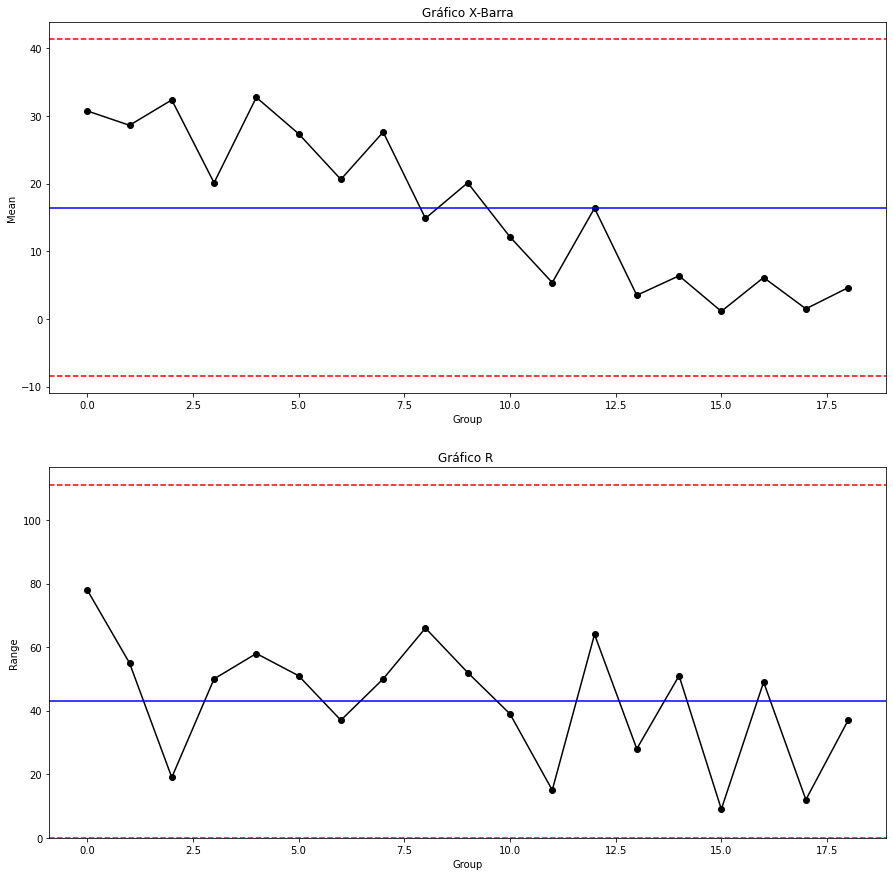

In [8]:

x = np.array(df_velocidade_linhas[['LINHA770','LINHA803','LINHA343','LINHA550','LINHA555','LINHA779','LINHA383',
                  'LINHA945']])

# Define list variable for groups means
x_bar = []

# Define list variable for groups ranges
r = [] 

# Get and append groups means and ranges
for group in x:
    x_bar.append(group.mean())
    r.append(group.max() - group.min())
    
# Plot x-bar and R charts
fig, axs = plt.subplots(2, figsize=(15,15))

# x-bar chart
axs[0].plot(x_bar, linestyle='-', marker='o', color='black')
axs[0].axhline((statistics.mean(x_bar)+0.577*statistics.mean(r)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(x_bar)-0.577*statistics.mean(r)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(x_bar)), color='blue')
axs[0].set_title('Gráfico X-Barra')
axs[0].set(xlabel='Group', ylabel='Mean')

# R chart
axs[1].plot(r, linestyle='-', marker='o', color='black')
axs[1].axhline((2.574*statistics.mean(r)), color='red', linestyle='dashed')
axs[1].axhline((0*statistics.mean(r)), color='red', linestyle='dashed')
axs[1].axhline((statistics.mean(r)), color='blue')
axs[1].set_ylim(bottom=0)
axs[1].set_title('Gráfico R ')
axs[1].set(xlabel='Group', ylabel='Range')

# Validate points out of control limits for x-bar chart
i = 0
control = True
for group in x_bar:
    if group > statistics.mean(x_bar)+0.577*statistics.mean(r) or group < statistics.mean(x_bar)-0.577*statistics.mean(r):
        print('Group', i, 'out of mean control limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')
    
# Validate points out of control limits for R chart
i = 0
control = True
for group in r:
    if group > 2.574*statistics.mean(r):
        print('Group', i, 'out of range cotrol limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')

   